In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def gamma_correction(img, c, gamma):
    img = img.astype(np.float32)
    img = c * img ** gamma

    # Normalize the image
    img = img / np.max(img) * 255

    return img.astype(np.uint8)

# Image Enhancements with Gamma correction


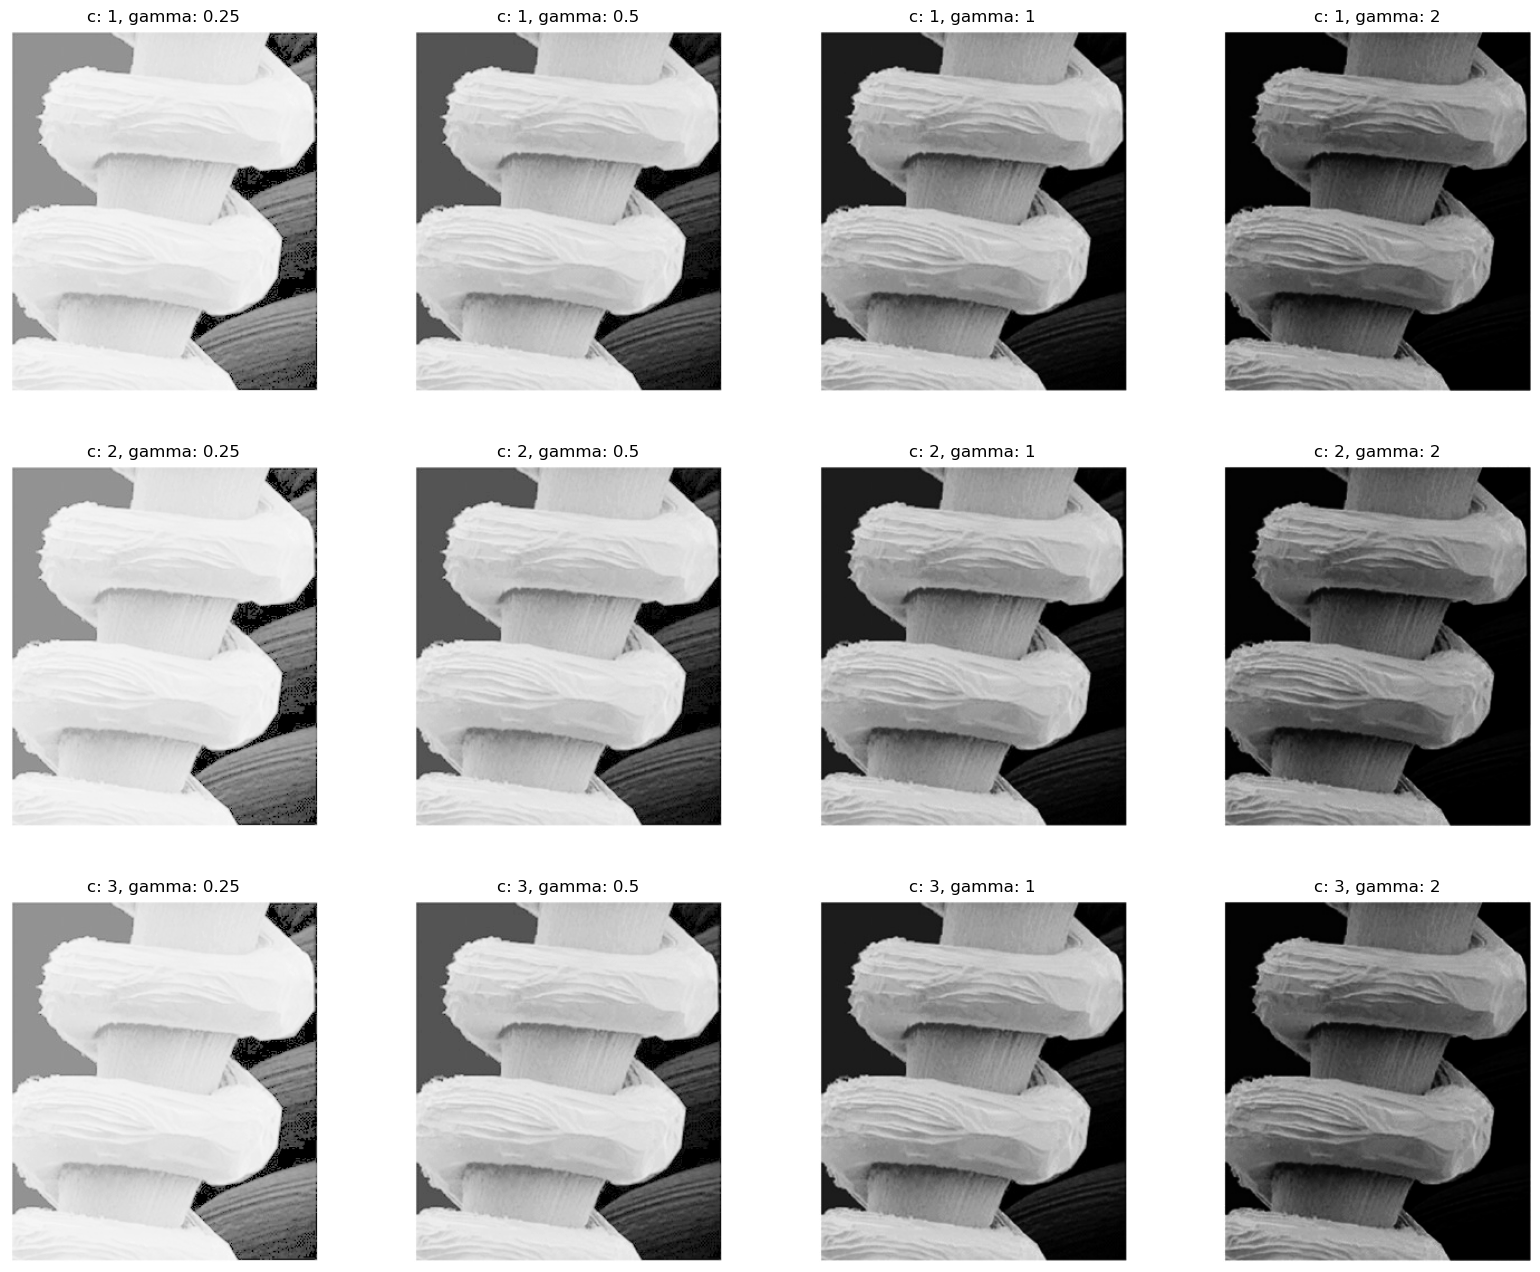

In [11]:
img_path = "./assignment2_image1.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

c_vals = [1, 2, 3]
gamma_vals = [0.25, 0.5, 1, 2]

row, col = len(c_vals), len(gamma_vals)
plt.figure(figsize=(20, 16))


# Apply gamma correction
for c in range(len(c_vals)):
    for gamma in range(len(gamma_vals)):
        c_val, gamma_val = c_vals[c], gamma_vals[gamma]
        img_corrected = gamma_correction(img, c_val, gamma_val)

        plt.subplot(row, col, c * col + gamma + 1)
        plt.imshow(img_corrected, cmap="gray")
        plt.axis("off")
        plt.title("c: {}, gamma: {}".format(c_val, gamma_val))

plt.savefig("./assignment2_image1_gamma_correction.png")
plt.show()

# Image enhancement with Global Histogram Equalization


In [12]:
def globalHistogramEqualiztion(img):

    # Calculate the histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    # Calculate the cumulative sum
    cdf = hist.cumsum()

    # Normalize the cdf
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Calculate the new pixel values
    img_new = cdf_normalized[img]

    return img_new

In [13]:
def plotHistogram(img, title):
    plt.figure(figsize=(10, 8))
    plt.hist(img.ravel(), 256, [0, 256])

    plt.xlabel("Intensity")
    plt.ylabel("Count")

    # x axis range
    plt.xlim([0, 256])
    plt.xticks(np.arange(0, 256, 16))

    plt.title(title)
    plt.show()

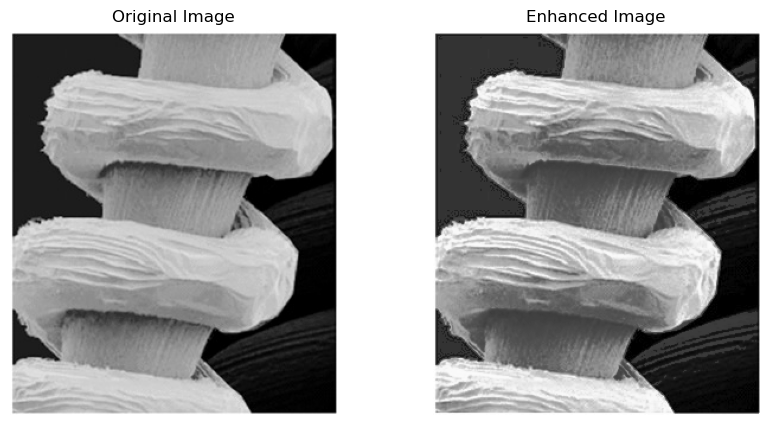

In [14]:
enchanced_img = globalHistogramEqualiztion(img)

# Plot the histogram
# plotHistogram(img, "Original Image Histogram")

plt.figure(figsize=(10, 5))

# Plot the image and subplot histogram
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(enchanced_img, cmap="gray")
plt.axis("off")
plt.title("Enhanced Image")

plt.savefig("./assignment2_image1_global_histogram_equalization.png")
plt.show()

# Image enhancement with Local Histogram Equalization


In [15]:
import cv2


def local_enhancement(img, E,  k0, k1, k2, neighborhood_size):
    """Enhances the input image using histogram statistics with given neighborhood sizes k0, k1, k2, k3, and neighborhood_size.

    Args:
      img: The input image (grayscale).
      E: The enhancement factor.
      k0: The upper bound on the mean intensity, relative to the mean intensity of the entire image.
      k1: The lower bound on the standard deviation, relative to the standard deviation of the entire image.
      k2: The upper bound on the standard deviation, relative to the standard deviation of the entire image.
      neighborhood_size: The neighborhood size for calculating the local mean intensity and local standard deviation.

    Returns:
      The enhanced image.
    """

    # Calculate the mean intensity and standard deviation of the entire image.
    global_mean_intensity, global_standard_deviation = cv2.meanStdDev(img)

    # Calculate the local mean intensity and local standard deviation.
    local_mean_intensity = cv2.blur(img, (neighborhood_size, neighborhood_size))
    local_mean_squared_intensity = cv2.blur(np.square(img), (neighborhood_size, neighborhood_size))
    local_standard_deviation = np.sqrt(local_mean_squared_intensity - np.square(local_mean_intensity))

    # Select the candidate pixels.
    candidate_pixels = []
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):

            mean_condition = local_mean_intensity[x, y] <= k0 * global_mean_intensity
            std_condition = k1 * global_standard_deviation <= local_standard_deviation[x, y] <= k2 * global_standard_deviation

            if mean_condition and std_condition:
                candidate_pixels.append((x, y))

    # Enhance the candidate pixels.
    enhanced_img = img.copy()
    for x, y in candidate_pixels:
        # Enhance the candidate pixel.
        enhanced_img[x, y] = min(max(img[x, y] * E, 0), 255)

    return enhanced_img

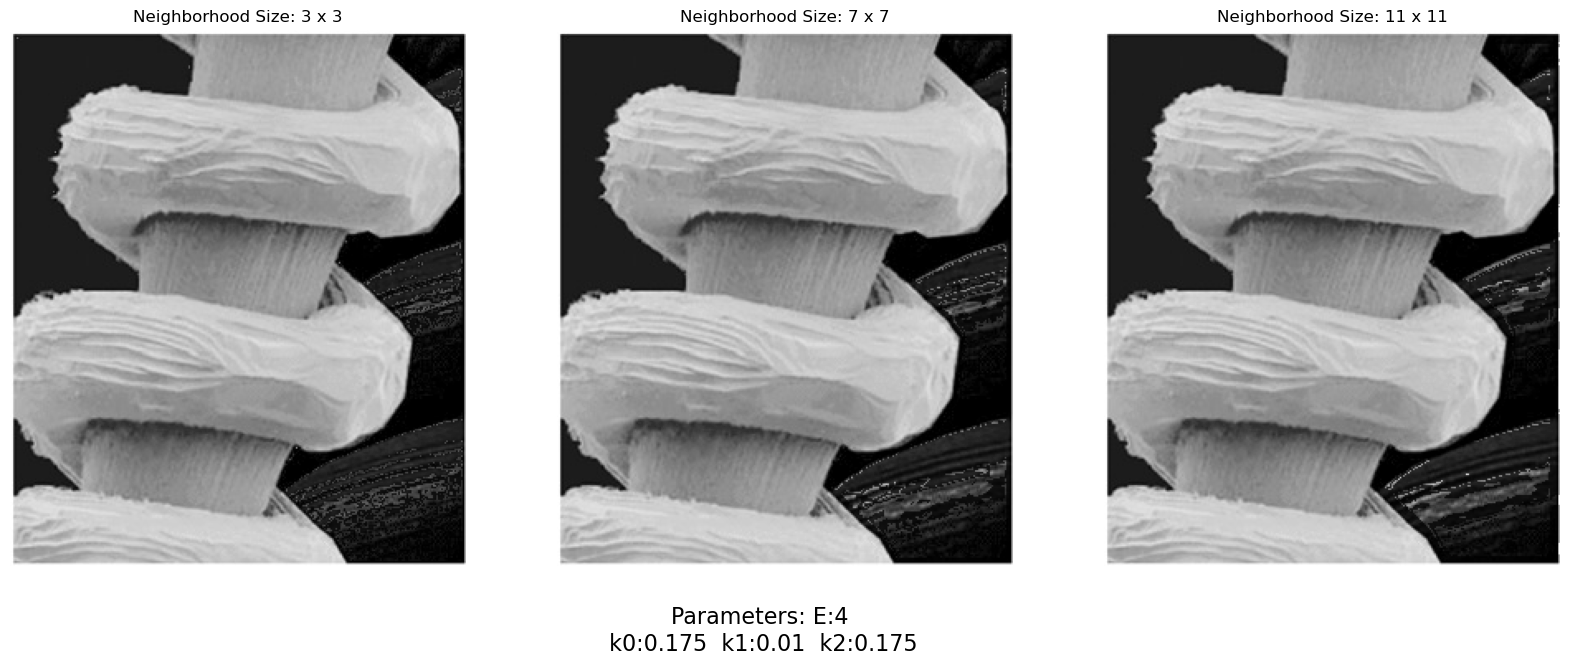

In [95]:
neighbourhood_sizes = [3, 7, 11]

row, col = 1, len(neighbourhood_sizes)

plt.figure(figsize=(20, 16))

E = 4
k0 = 0.175
k1 = 0.01
k2 = 0.175

for i in range(len(neighbourhood_sizes)):
    neighbourhood_size = neighbourhood_sizes[i]
    enhanced_img = local_enhancement(
        img,
        E=E,
        k0=k0,
        k1=k1, k2=k2,
        neighborhood_size=neighbourhood_size
    )

    plt.subplot(row, col, i + 1)
    plt.imshow(enhanced_img, cmap="gray")
    plt.axis("off")
    plt.title(f"Neighborhood Size: {neighbourhood_size} x {neighbourhood_size}")

# Add text at bottom
plt.figtext(0.5, 0.275, f"Parameters: E:{E}\n k0:{k0}  k1:{k1}  k2:{k2}", ha="center", fontsize=16)
plt.savefig("./assignment2_image1_local_enhancement.png")
plt.show()